In [30]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import IntegerType,DoubleType
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.regression import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np


# Se muestra el esquema del dataset
spark = SparkSession.builder.appName('ml-eshop').getOrCreate()
df = spark.read.format("csv").option("delimiter", ",").option("header",True).load("normal.csv")
df.printSchema()


# castear todos los numeros cargados como string a int
for col in df.columns:
    df = df.withColumn(col,df[col].cast(IntegerType()))


# Se agrupa el dataset de acuerdo a la variable objetivo
labeled = df.groupby("clicks").count()
#labeled.show()


# Se guarda en la lista names los nombres de las columnas exceptuando la variable objetivo
names = list()
for i in df.columns:
    if i!="clicks":
        names.append(i)

# Se convierte a vectorAssembler para poder usar los modelos de Machine Learning

vectorAssembler = VectorAssembler(inputCols = names, outputCol = 'features')
vhouse_df = vectorAssembler.transform(df)
vhouse_df = vhouse_df.select(['features', 'clicks'])

# Se parte el conjunto de datos en entrenamiento  = 70% y prueba = 30%
splits = vhouse_df.randomSplit([0.7, 0.3])



# se guarda cada subconjunto en variables diferentes
train_df = splits[0] 
test_df = splits[1] 
#train_df.show()
#test_df.show()


# Modelos de Regresionn
# Random Forest Regressor

# se crea y entrena el modelo
rf = RandomForestRegressor(labelCol="clicks", maxBins=217, seed = 2)
model = rf.fit(train_df)

rf_prediction = model.transform(test_df)
test_prediction_rf = rf_prediction.select("prediction","clicks")

evaluator = RegressionEvaluator(labelCol="clicks")

print("\nModelo Random Forest Regressor")
print("R Squared (R2) on test data = %g" % evaluator.evaluate(test_prediction_rf, {evaluator.metricName: "r2"}))
print("Root Mean Squared Error (RMSE) on test data = %g" % evaluator.evaluate(test_prediction_rf, {evaluator.metricName: "rmse"}))
imp = model.featureImportances

root
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- order: string (nullable = true)
 |-- country: string (nullable = true)
 |-- page_1: string (nullable = true)
 |-- colour: string (nullable = true)
 |-- location: string (nullable = true)
 |-- model_photography: string (nullable = true)
 |-- price: string (nullable = true)
 |-- price_2: string (nullable = true)
 |-- page: string (nullable = true)
 |-- clicks: string (nullable = true)


Modelo Random Forest Regressor
R Squared (R2) on test data = 0.749882
Root Mean Squared Error (RMSE) on test data = 391.299


In [31]:
importances = imp.toArray()
unsorted_list = [(importance, name) for name, importance in 
                  zip(names, importances)]
sorted_list = sorted(unsorted_list, reverse=True)

features_sorted = []
importance_sorted = []

for i in sorted_list:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

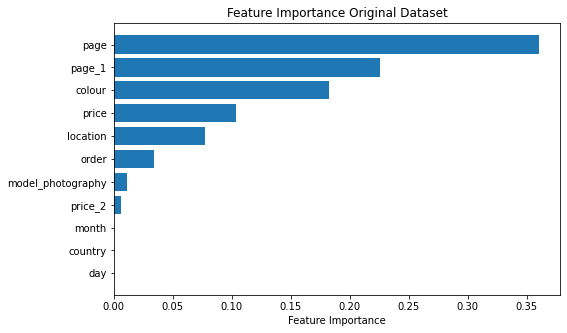

In [32]:
fig, ax = plt.subplots(figsize=(8,5))
y_pos = np.arange(len(importance_sorted))

ax.barh(y_pos, importance_sorted, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(features_sorted)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importance Original Dataset')

plt.savefig('importance_barh_normal.png', dpi=100)
plt.show()

In [33]:
# Se muestra el esquema del dataset
spark = SparkSession.builder.appName('ml-eshop').getOrCreate()
df = spark.read.format("csv").option("delimiter", ",").option("header",True).load("graphed.csv")
df.printSchema()


# castear todos los numeros cargados como string a int
for col in df.columns:
    df = df.withColumn(col,df[col].cast(IntegerType()))


# Se agrupa el dataset de acuerdo a la variable objetivo
labeled = df.groupby("clicks").count()
#labeled.show()


# Se guarda en la lista names los nombres de las columnas exceptuando la variable objetivo
names = list()
for i in df.columns:
    if i!="clicks":
        names.append(i)

# Se convierte a vectorAssembler para poder usar los modelos de Machine Learning

vectorAssembler = VectorAssembler(inputCols = names, outputCol = 'features')
vhouse_df = vectorAssembler.transform(df)
vhouse_df = vhouse_df.select(['features', 'clicks'])

# Se parte el conjunto de datos en entrenamiento  = 70% y prueba = 30%
splits = vhouse_df.randomSplit([0.7, 0.3])



# se guarda cada subconjunto en variables diferentes
train_df = splits[0] 
test_df = splits[1] 
#train_df.show()
#test_df.show()


# Modelos de Regresionn
# Random Forest Regressor

# se crea y entrena el modelo
rf = RandomForestRegressor(labelCol="clicks", maxBins=217, seed = 2)
model = rf.fit(train_df)

rf_prediction = model.transform(test_df)
test_prediction_rf = rf_prediction.select("prediction","clicks")

evaluator = RegressionEvaluator(labelCol="clicks")

print("\nModelo Random Forest Regressor")
print("R Squared (R2) on test data = %g" % evaluator.evaluate(test_prediction_rf, {evaluator.metricName: "r2"}))
print("Root Mean Squared Error (RMSE) on test data = %g" % evaluator.evaluate(test_prediction_rf, {evaluator.metricName: "rmse"}))
imp2 = model.featureImportances

root
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- order: string (nullable = true)
 |-- country: string (nullable = true)
 |-- page_1: string (nullable = true)
 |-- colour: string (nullable = true)
 |-- location: string (nullable = true)
 |-- model_photography: string (nullable = true)
 |-- price: string (nullable = true)
 |-- price_2: string (nullable = true)
 |-- page: string (nullable = true)
 |-- louvain_comm: string (nullable = true)
 |-- clustering_coeff: string (nullable = true)
 |-- betweenness: string (nullable = true)
 |-- x: string (nullable = true)
 |-- y: string (nullable = true)
 |-- z: string (nullable = true)
 |-- clicks: string (nullable = true)


Modelo Random Forest Regressor
R Squared (R2) on test data = 0.962963
Root Mean Squared Error (RMSE) on test data = 151.124


In [34]:
importances = imp2.toArray()
unsorted_list = [(importance, name) for name, importance in 
                  zip(names, importances)]
sorted_list = sorted(unsorted_list, reverse=True)

features_sorted = []
importance_sorted = []

for i in sorted_list:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

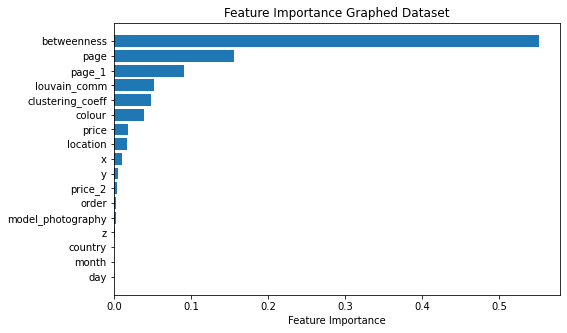

In [35]:
fig, ax = plt.subplots(figsize=(8,5))
y_pos = np.arange(len(importance_sorted))

ax.barh(y_pos, importance_sorted, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(features_sorted)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importance Graphed Dataset')

plt.savefig('importance_barh_graphed.png', dpi=100)
plt.show()